# Seismic Detection Across the Solar System

### Implementing algorithm and its testing

This notebook contains an implementation of a simple algorithm for detecting quakes based on ground displacement velocity readings from a seismometer.

The first cells of the notebook are responsible for the implementation of the functionality, including the shock search itself, later there are examples of solutions found by the algorithm.


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
import math
import glob
import re

## Algorithm description

#### We expect an quake to occur when the speed of ground movement increases rapidly and then slowly decreases to its former values. In that case, if this quake occurred, there should be a period in which the average ground velocity is much higher than in other time segments. The left border of such a period, in which this average is highest, should mark the beginning of the quake, as can be seen in the graph below.

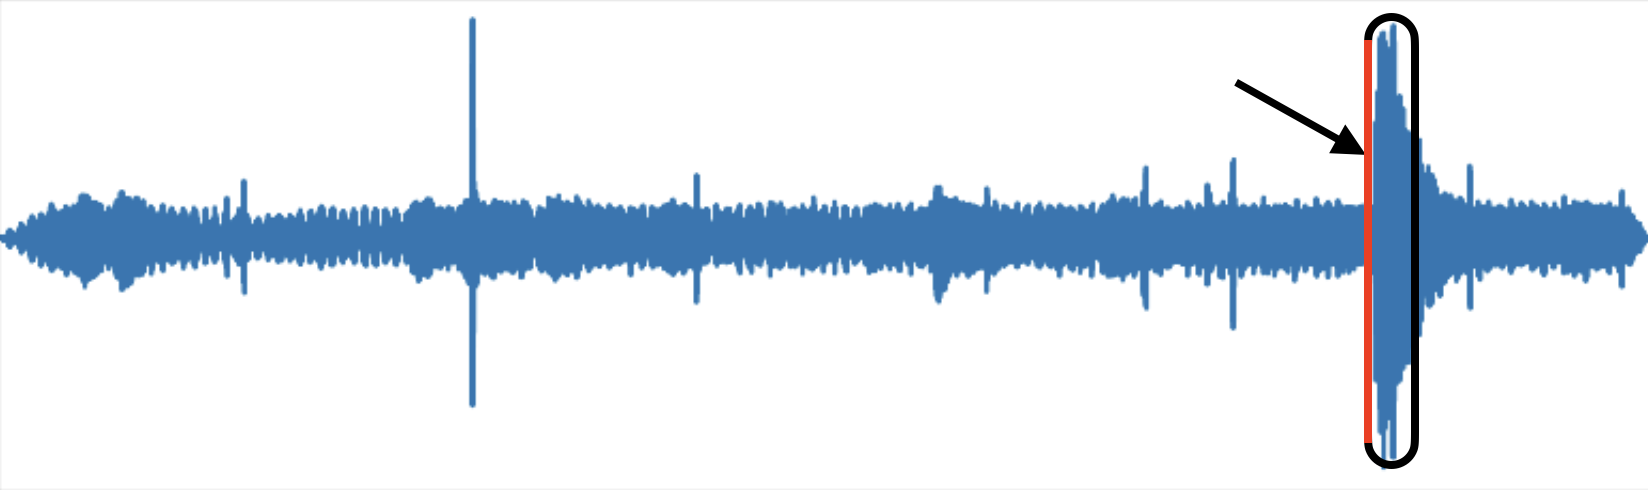

#### Therefore, the algorithm should count the average speed over successive, overlapping short segments of time and compare it with the average speed over some longer segment of time in that area. The method that has been implemented here detects the highest average speed in the set and considers that this is the only moment in the middle of the day when such an earthquake occurred. Of course, this is a solution that is not applicable to the real situation and needs to be refined, while in the context of the data provided to us it works very well.

In [3]:
def findAnomaly(df, width = 1000, step = 10):
    times = df['time_rel(sec)']
    velocities = df['velocity(m/s)']
    means = [0 for _ in range((len(times) - width)//step + 1)]
    i = 0
    cur = width
    while cur < len(times):
        means[i] = velocities[cur - width:cur].abs().mean()
        i += 1
        cur += step
    quakeTime = np.argmax(means)*step
    return quakeTime


In [65]:
def drawArrival(df, missionName, eventId, timeRecorded = None):
    times = np.array(df['time_rel(sec)'].tolist())
    velocities = np.array(df['velocity(m/s)'].tolist())
    arrival = times[findAnomaly(df)]

    fig,ax = plt.subplots(1,1,figsize=(10,3))
    ax.plot(times,velocities)

    ax.set_xlim([min(times),max(times)])
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_title(missionName + ', event id - ' + eventId, fontweight='bold')

    linePrognosed = ax.axvline(x=arrival, c='red', label='Prognosed Arrival')
    ax.legend(handles=[linePrognosed])
    if timeRecorded:
        lineRecorded = ax.axvline(x=timeRecorded, c='black', label='Recorded Arrival')
        ax.legend(handles=[lineRecorded, linePrognosed])


In [8]:
# Loading csvs from trainging datasets
trainCat = './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/'
trainDfs = []
dfs = glob.glob(trainCat + '*.csv')
for filename in dfs:
    match = re.search(r'(\d+)(?=\.\w+$)', filename)
    if match:
        id = str(int(match.group(1)))
    else:
        id = "0"
    trainDfs.append((pd.read_csv(filename), id))

In [ ]:
# Loading recorded arrival of quakes from training datasets
catalogsDf = pd.read_csv('./space_apps_2024_seismic_detection/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv')
catalog = {}
for row in catalogsDf.iterrows():
    catalog[str(int(row[1][3][4:]))] = row[1][2]

### Comparison of the quake onset time found by the algorithm with time recorded for several cases

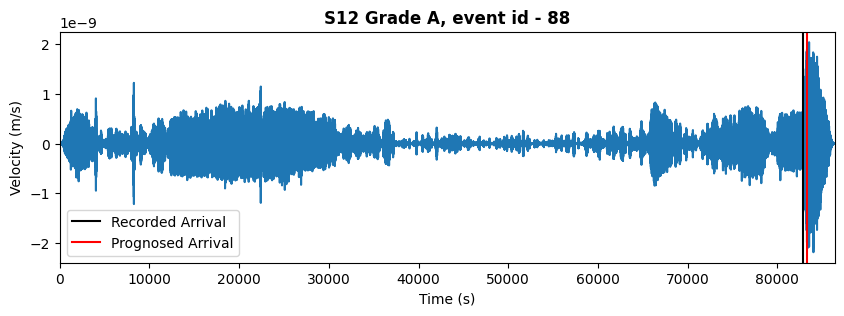

In [66]:
drawArrival(trainDfs[0][0], 'S12 Grade A', trainDfs[0][1], catalog[trainDfs[0][1]])

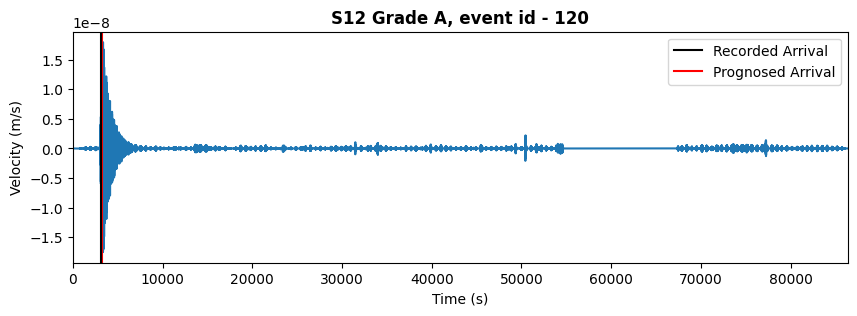

In [67]:
drawArrival(trainDfs[5][0], 'S12 Grade A', trainDfs[5][1], catalog[trainDfs[5][1]])

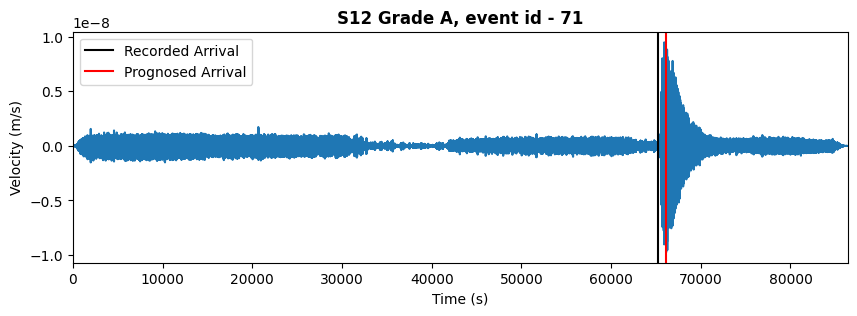

In [69]:
drawArrival(trainDfs[23][0], 'S12 Grade A', trainDfs[23][1], catalog[trainDfs[23][1]])

### Quake onsets found in example cases of test datasets

In [74]:
test12BCat = './space_apps_2024_seismic_detection/data/lunar/test/data/S12_GradeB/'
test12BDfs = []
dfs = glob.glob(test12BCat + '*.csv')
for filename in dfs:
    match = re.search(r'(\d+)(?=\.\w+$)', filename)
    if match:
        id = str(int(match.group(1)))
    else:
        id = "0"
    test12BDfs.append([pd.read_csv(filename), id])

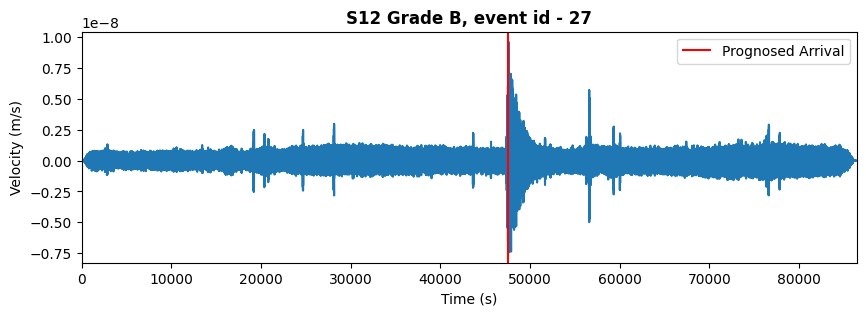

In [76]:
drawArrival(test12BDfs[0][0], 'S12 Grade B', test12BDfs[0][1])

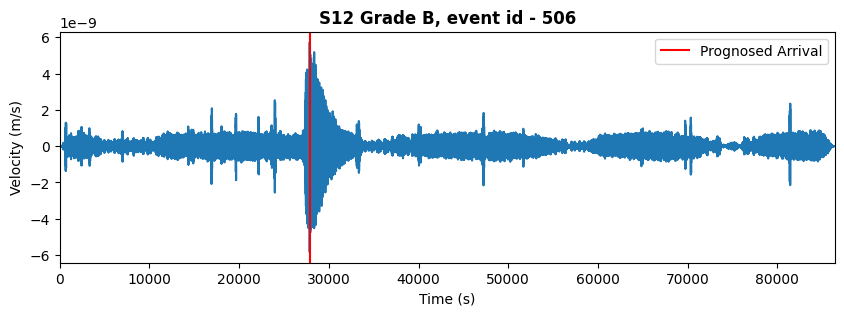

In [77]:
drawArrival(test12BDfs[5][0], 'S12 Grade B', test12BDfs[5][1])

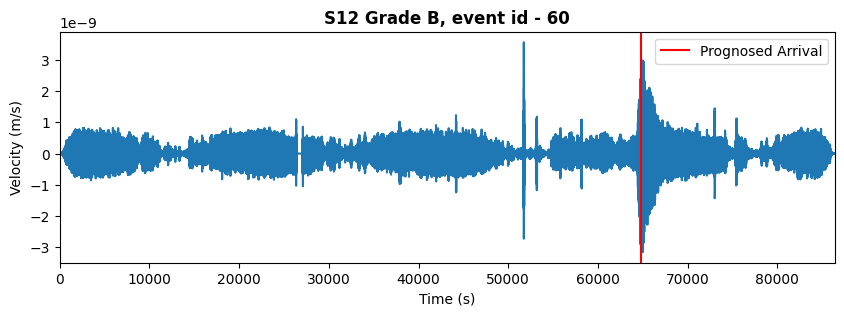

In [78]:
drawArrival(test12BDfs[23][0], 'S12 Grade B', test12BDfs[23][1])